## Introduction to GeoPandas

> *Adds geospacial abilities to pandas*

Links
- [YouTube playlist by Jonathan Soma](https://www.youtube.com/playlist?list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh)
- [GeoPandas Documentation](https://geopandas.org/en/stable/docs.html)

Outras bibliotecas
- Shapely - deals with geometric shapes
    - GEOS software
- Fiona - package to read and write files (shape files, GeoJSON)
    - OGR software
- pyproj - cartographic projections
    - PROJ.4
- descartes - mapping
- geopy - geocoding - locate the coordinates of addresses, cities, countries and landmarks
- Rtree - spatial indexing analysis
- PySAL - spatial analysis functions (more advanced than Rtree) - coloring maps
- numpy - math

O que é necessário instalar
- brew install gdal [download wheel](https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal) -> cd Dowloads -> python -m pip install nome_do_arquivo.whl
- pip install geos
- brew install spatialindex (parece que não precisa e não consegui instalar anyway)
- pip install pillow
- pip install pysal
- pip install geopandas
- pip install basemap
- pip install rtree

### 0. Bibliotecas

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

%matplotlib inline

### 1. Shapefile contents

- shapefile - geometry of the shapes (.shp)
- database file - extra info (.dbf)
- projection file (.prj)
- index file (.shx)
- specify codepage for identifying the characterset to be used (.cpg)

Links
- [Another extensions](https://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/shapefile-file-extensions.htm)
- [Kaggle database - Shapefiles USA states](https://www.kaggle.com/datasets/nswitzer/usa-state-shapeflies)
- [Kaggle database - Shapefiles Brazil states](https://www.kaggle.com/datasets/rodsaldanha/brazilianstatesshapefiles)

In [6]:
# .shp file

states = gpd.read_file('states/cb_2018_us_state_500k.shp')
states.sort_values('NAME').head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
17,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
27,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
37,60,01802701,0400000US60,60,AS,American Samoa,00,197759063,1307243754,"MULTIPOLYGON (((-168.14582 -14.54791, -168.145..."
35,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
52,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."


In [7]:
# .dbf file

gpd.read_file("states/cb_2018_us_state_500k.dbf").head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


(15.0, 75.0)

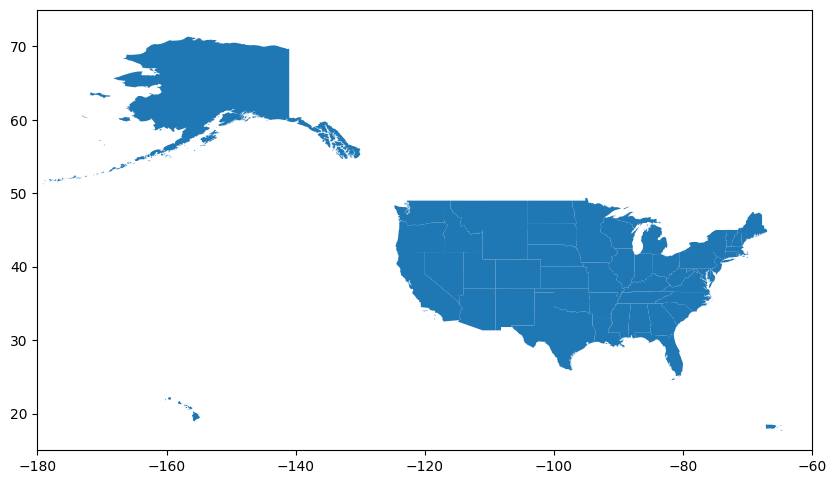

In [20]:
fig, ax = plt.subplots(figsize = (10, 10))

states.plot(ax = ax)

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)